In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

Import the dataset:

In [ ]:
df = pd.read_csv("NSE-TATAGLOBAL.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [ ]:

df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

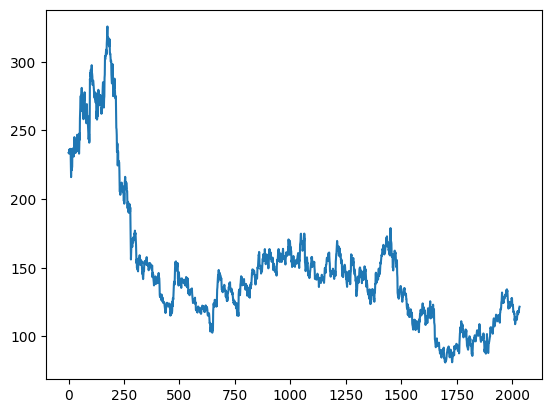

In [ ]:
plt.plot(df["Close"])

In [ ]:
df_close = df["Close"]
df_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

Feature Scaling (MinMax Scaler):-

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
df_close_scaled = sc.fit_transform(np.array(df_close).reshape(-1,1))
df_close_scaled

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])


Split the dataset into train and test:-

In [ ]:
train_data = int(len(df_close_scaled)*0.7)
test_data = len(df_close_scaled) - train_data
train_data,test_data = df_close_scaled[0:train_data,:],df_close_scaled[train_data:len(df_close_scaled),:1]

In [ ]:
train_data.shape

(1424, 1)

In [ ]:

test_data.shape

(611, 1)

Convert an array of values into a dataset matrix:-

In [ ]:
def create_dataset(dataset,time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

Reshaping of dataset:-

In [ ]:
time_step = 100
x_train,y_train = create_dataset(train_data,time_step)
x_test,y_test = create_dataset(test_data,time_step)

In [ ]:

x_train.shape

(1323, 100)

In [ ]:

x_test.shape

(510, 100)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:

x_train

array([[[0.62418301],
        [0.62214052],
        [0.62622549],
        ...,
        [0.83455882],
        [0.86213235],
        [0.85273693]],

       [[0.62214052],
        [0.62622549],
        [0.63378268],
        ...,
        [0.86213235],
        [0.85273693],
        [0.87111928]],

       [[0.62622549],
        [0.63378268],
        [0.62234477],
        ...,
        [0.85273693],
        [0.87111928],
        [0.84497549]],

       ...,

       [[0.26041667],
        [0.2563317 ],
        [0.24652778],
        ...,
        [0.33415033],
        [0.33986928],
        [0.34681373]],

       [[0.2563317 ],
        [0.24652778],
        [0.23611111],
        ...,
        [0.33986928],
        [0.34681373],
        [0.3500817 ]],

       [[0.24652778],
        [0.23611111],
        [0.25204248],
        ...,
        [0.34681373],
        [0.3500817 ],
        [0.32618464]]])


Created the Stacked LSTM Model:-

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()
# First LSTM layer
model.add(LSTM(units = 50,return_sequences = True,input_shape = (100, 1)))

# second LSTM layer
model.add(LSTM(units = 50, return_sequences = True))

# third LSTM layer
model.add(LSTM(units = 50, return_sequences = True))

# fourth LSTM layer
model.add(LSTM(units = 50))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
42/42 [==============================] - 20s 279ms/step - loss: 0.0156
Epoch 2/50
42/42 [==============================] - 11s 267ms/step - loss: 0.0023
Epoch 3/50
42/42 [==============================] - 12s 284ms/step - loss: 0.0022
Epoch 4/50
42/42 [==============================] - 14s 337ms/step - loss: 0.0019
Epoch 5/50
42/42 [==============================] - 19s 459ms/step - loss: 0.0019
Epoch 6/50
42/42 [==============================] - 11s 263ms/step - loss: 0.0017
Epoch 7/50
42/42 [==============================] - 11s 264ms/step - loss: 0.0015
Epoch 8/50
42/42 [==============================] - 11s 267ms/step - loss: 0.0013
Epoch 9/50
42/42 [==============================] - 10s 245ms/step - loss: 0.0013
Epoch 10/50
42/42 [==============================] - 11s 255ms/step - loss: 0.0013
Epoch 11/50
42/42 [==============================] - 9s 214ms/step - loss: 0.0010
Epoch 12/50
42/42 [==============================] - 10s 237ms/step - loss: 0.0011
Epoch 13/50
42

Predict the model:-

In [ ]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)


16/16 [==============================] - 1s 59ms/step


In [ ]:
train_pred = sc.inverse_transform(train_pred)
test_pred = sc.inverse_transform(test_pred)

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
print("Mean Squared Error of training data :",math.sqrt(mean_squared_error(y_train,train_pred)))

Mean Squared Error of training data : 164.25915470220193


In [ ]:
print("Mean Squared Error of testing data :",math.sqrt(mean_squared_error(y_test,test_pred)))

Mean Squared Error of testing data : 108.2540036952122



Visualising the result:-

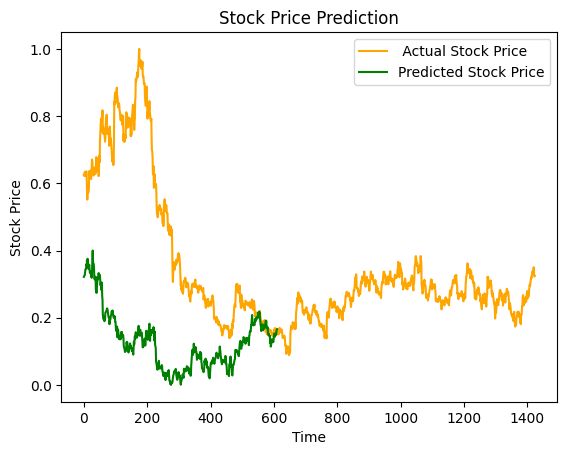

In [ ]:
plt.plot(train_data, color = 'orange', label = ' Actual Stock Price')
plt.plot(test_data, color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()